In [ ]:
@time include("data-processing.jl")

In [2]:
@time include("make-model.jl")

  0.015042 seconds (5.33 k allocations: 325.334 KiB)


test (generic function with 1 method)

In [3]:
@time include("normalize.jl")

  0.004493 seconds (1.55 k allocations: 90.267 KiB)


normalized_data (generic function with 1 method)

In [4]:
@time (input_data, output_data) = load_stock_data(
    ["AMD", "MU", "NVDA"],
    Set(["AMD"]),
    name -> open(`uniq ../ibpont/pol_data/$name.csv`)
)

159.732867 seconds (782.75 M allocations: 78.035 GiB, 11.40% gc time)


(1086283×113 TimeArray{Float64,2,DateTime,Array{Float64,2}} 2010-01-04T13:12:00 to 2020-05-19T23:59:00, 1370202×1 TimeArray{Float64,1,DateTime,Array{Float64,1}} 2010-01-04T11:28:00 to 2020-05-19T23:58:00)

In [5]:
function denan(input_data::Array)
    for i in 1:length(input_data)
        if isnan(input_data[i])
            input_data[i] = 0
        end
        if isinf(input_data[i])
            input_data[i] = 1
        end
    end
end

denan (generic function with 1 method)

In [6]:
@time denan(values(input_data));
@time output_data = truncation_hack(output_data, input_data);
@time input_data = truncation_hack(input_data, output_data);

  0.307280 seconds (19.77 k allocations: 1.029 MiB)
  0.109568 seconds (106.07 k allocations: 67.937 MiB)
  0.671388 seconds (47.65 k allocations: 993.229 MiB)


In [7]:
input_data

1086282×113 TimeArray{Float64,2,DateTime,Array{Float64,2}} 2010-01-04T13:12:00 to 2020-05-19T23:58:00
│                     │ AMD_volume │ AMD_vwap │ AMD_open │ AMD_close │
├─────────────────────┼────────────┼──────────┼──────────┼───────────┤
│ 2010-01-04T13:12:00 │ 598.0      │ 9.79     │ 9.79     │ 9.79      │
│ 2010-01-04T13:29:00 │ 5965.0     │ 9.8      │ 9.8      │ 9.8       │
│ 2010-01-04T13:30:00 │ 5900.0     │ 9.771    │ 9.8      │ 9.77      │
│ 2010-01-04T13:45:00 │ 500.0      │ 9.88     │ 9.88     │ 9.88      │
│ 2010-01-04T14:07:00 │ 1200.0     │ 9.8908   │ 9.89     │ 9.89      │
│ 2010-01-04T14:09:00 │ 800.0      │ 9.8763   │ 9.88     │ 9.88      │
│ 2010-01-04T14:17:00 │ 200.0      │ 9.88     │ 9.88     │ 9.88      │
│ 2010-01-04T14:28:00 │ 10920.0    │ 9.8007   │ 9.81     │ 9.8       │
│ 2010-01-04T14:30:00 │ 442294.0   │ 9.8072   │ 9.79     │ 9.82      │
│ 2010-01-04T14:31:00 │ 127984.0   │ 9.8263   │ 9.81     │ 9.84      │
│ 2010-01-04T14:32:00 │ 119842.0   │ 9.8447   

In [8]:
output_data

1086282×1 TimeArray{Float64,1,DateTime,Array{Float64,1}} 2010-01-04T13:12:00 to 2020-05-19T23:58:00
│                     │ AMD_buy │
├─────────────────────┼─────────┤
│ 2010-01-04T13:12:00 │ 0.0     │
│ 2010-01-04T13:29:00 │ 0.0     │
│ 2010-01-04T13:30:00 │ 1.0     │
│ 2010-01-04T13:45:00 │ 0.0     │
│ 2010-01-04T14:07:00 │ 0.0     │
│ 2010-01-04T14:09:00 │ 0.0     │
│ 2010-01-04T14:17:00 │ 0.0     │
│ 2010-01-04T14:28:00 │ 0.0     │
│ 2010-01-04T14:30:00 │ 1.0     │
│ 2010-01-04T14:31:00 │ 1.0     │
│ 2010-01-04T14:32:00 │ 0.0     │
│ 2010-01-04T14:33:00 │ 0.0     │
   ⋮
│ 2020-05-19T22:10:00 │ 0.0     │
│ 2020-05-19T22:20:00 │ 0.0     │
│ 2020-05-19T22:36:00 │ 0.0     │
│ 2020-05-19T23:26:00 │ 0.0     │
│ 2020-05-19T23:43:00 │ 0.0     │
│ 2020-05-19T23:45:00 │ 1.0     │
│ 2020-05-19T23:50:00 │ 0.0     │
│ 2020-05-19T23:51:00 │ 0.0     │
│ 2020-05-19T23:56:00 │ 0.0     │
│ 2020-05-19T23:57:00 │ 1.0     │
│ 2020-05-19T23:58:00 │ 1.0     │

In [9]:
@time input_data = normalized_data(
    input_data,
    Dict(
        :8 => colnames(input_data),
        :64 => colnames(input_data),
    )
)

 41.340179 seconds (25.35 M allocations: 39.585 GiB, 2.73% gc time)


226×1086282 Array{Float32,2}:
   0.0    1.0    0.987889     -0.0182597  …    0.00164969     0.00163264
   0.0    1.0   -1.89996       3.75859         0.382893       0.409938
   0.0    1.0    1.0           8.99981         0.379081       0.379081
   0.0    1.0   -1.9999        3.66669         0.396215       0.453047
   0.0    1.0    1.0           8.99981         0.35526        0.386663
   0.0    1.0   -1.9999        3.66669    …    0.428073       0.486108
   0.0    1.0    1.0           0.0           NaN            NaN
   0.0    1.0    0.984416     -0.0704867     NaN            NaN
 NaN    NaN     Inf            0.0             0.444609       0.370508
 NaN    NaN    NaN           NaN               0.0            0.133333
 NaN    NaN     Inf            0.0        …    0.117647       0.0
 NaN    NaN     Inf            0.0             0.1            0.1
 NaN    NaN     Inf            0.0             0.445985       0.371987
   ⋮                                      ⋱    ⋮            
 NaN    

In [10]:
@time denan(input_data);

  0.557331 seconds (19.74 k allocations: 1.027 MiB)


In [11]:
@time output_data = convert(Matrix{Float32}, values(output_data)')

  0.007463 seconds (122 allocations: 4.152 MiB)


1×1086282 Array{Float32,2}:
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  0.0  0.0  1.0  1.0

In [12]:
@show input_size = size(input_data, 1)
@show output_size = size(output_data, 1)
@time model = StockLSTM(input_size, output_size)

input_size = size(input_data, 1) = 226
output_size = size(output_data, 1) = 1
  1.950643 seconds (2.15 M allocations: 152.184 MiB)


Chain((LSTM(input=226,hidden=512,layers=2), Linear(P(KnetArray{Float32,2}(1,512)), P(KnetArray{Float32,1}(1)))))

In [13]:
@show total_samples = size(input_data, 2)
@assert total_samples == size(output_data, 2)
@show train_test_split = 19/20
@show train_samples = Int64(round(train_test_split * total_samples))
@show minibatch_length = 128;

total_samples = size(input_data, 2) = 1086282
train_test_split = 19 / 20 = 0.95
train_samples = Int64(round(train_test_split * total_samples)) = 1031968
minibatch_length = 128 = 128


In [14]:
@time training_data = minibatch(
    KnetArray(input_data[:, 1:train_samples]),
    KnetArray(output_data[:, 1:train_samples]),
    minibatch_length
)

  0.898256 seconds (461.87 k allocations: 917.484 MiB)


Data{Tuple{KnetArray{Float32,2},KnetArray{Float32,2}}}(K32(226,1031968)[0.0⋯], K32(1,1031968)[0.0⋯], 128, 1031968, false, 1031841, 1:1031968, false, (226, 1031968), (1, 1031968), KnetArray{Float32,2}, KnetArray{Float32,2})

In [15]:
@time testing_data = minibatch(
    KnetArray(input_data[:, train_samples:end]),
    KnetArray(output_data[:, train_samples:end]),
    minibatch_length
)

  0.042237 seconds (2.13 k allocations: 47.132 MiB)


Data{Tuple{KnetArray{Float32,2},KnetArray{Float32,2}}}(K32(226,54315)[0.9379155⋯], K32(1,54315)[0.0⋯], 128, 54315, false, 54188, 1:54315, false, (226, 54315), (1, 54315), KnetArray{Float32,2}, KnetArray{Float32,2})

In [16]:
@show epochs = 20;
@show length(training_data);
@show length(testing_data);

epochs = 20 = 20
length(training_data) = 8062
length(testing_data) = 424


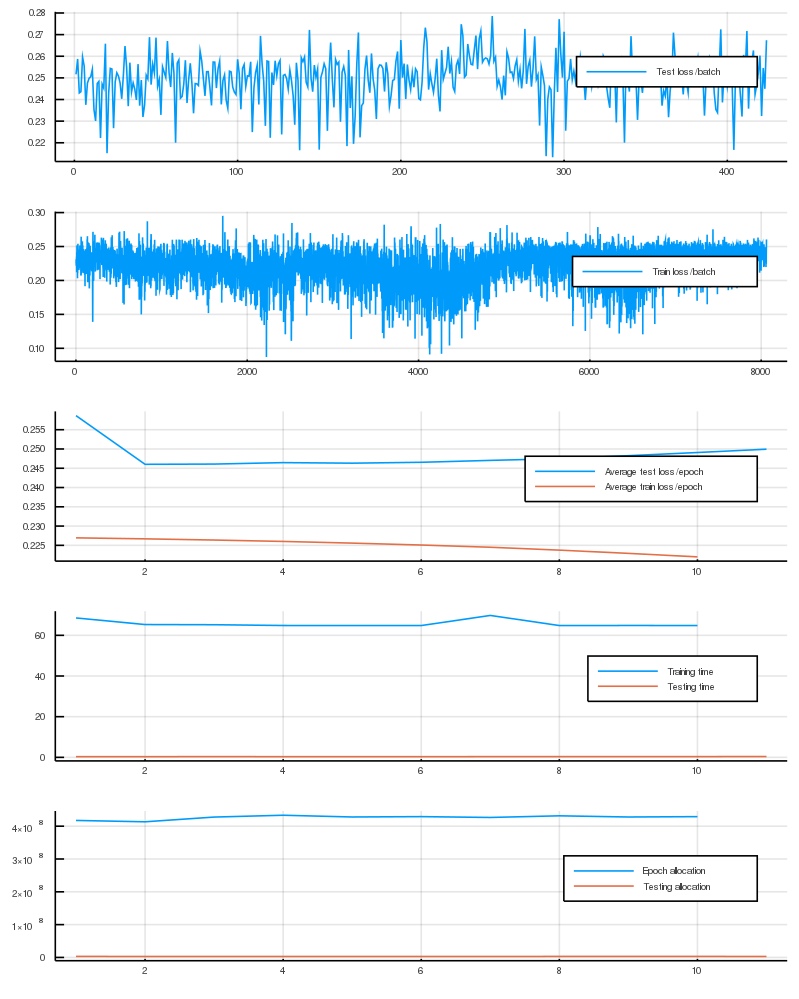


Stacktrace:
 [1] forw(::Function, ::Function, ::Vararg{Any,N} where N; kwargs::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at /home/tekne/.julia/packages/AutoGrad/6QsMu/src/core.jl:66
 [2] forw at /home/tekne/.julia/packages/AutoGrad/6QsMu/src/core.jl:65 [inlined]
 [3] #sum#103 at ./none:0 [inlined]
 [4] sum(::typeof(abs2), ::AutoGrad.Result{KnetArray{Float32,2}}) at ./none:0
 [5] (::Chain)(::KnetArray{Float32,2}, ::KnetArray{Float32,2}; o::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at /home/tekne/Documents/Projects/stock-lstm/make-model.jl:23
 [6] (::Chain)(::KnetArray{Float32,2}, ::KnetArray{Float32,2}) at /home/tekne/Documents/Projects/stock-lstm/make-model.jl:21
 [7] (::Knet.var"#693#694"{Knet.Minimize{Data{Tuple{KnetArray{Float32,2},KnetArray{Float32,2}}}},Tuple{KnetArray{Float32,2},KnetArray{Float32,2}}})() at /home/tekne/.julia/packages/AutoGrad/6QsMu/src/core.jl:205
 [8] differentiate(::Function; o::Base.Iterators.Pairs{Unio

InterruptException: InterruptException:

In [19]:
using Plots
using IJulia

test_losses = []
train_losses = []
avg_epoch_test_losses = []
avg_epoch_train_losses = []
epoch_train_times = []
epoch_test_times = []
epoch_train_allocs = []
epoch_test_allocs = []

function update_plots(epoch)   
    test_loss_plot = plot(test_losses; label="Test loss/batch")
    train_loss_plot = plot(train_losses; label="Train loss/batch")
    epoch_loss_plot = plot(
        [avg_epoch_test_losses, avg_epoch_train_losses], 
        label=["Average test loss/epoch" "Average train loss/epoch"]
    )
    epoch_time_plot = plot(
        [epoch_train_times, epoch_test_times],
        label=["Training time" "Testing time"]
    )
    epoch_alloc_plot = plot(
        [epoch_train_allocs, epoch_test_allocs],
        label=["Epoch allocation" "Testing allocation"]
    )
    IJulia.clear_output(true)
    plot(
        test_loss_plot, 
        train_loss_plot, 
        epoch_loss_plot,
        epoch_time_plot,
        epoch_alloc_plot
        ; 
        layout=(5, 1), size=(800, 1000)
    ) |> IJulia.display
end

for epoch in 1:epochs
    test_losses, test_time, test_alloc, _, _ = @timed test(model, testing_data)
    push!(avg_epoch_test_losses, mean(test_losses))
    push!(epoch_test_times, test_time)
    push!(epoch_test_allocs, test_alloc)
    update_plots(epoch)
    train_losses, train_time, train_alloc, _, _ = @timed train(model, training_data)
    push!(avg_epoch_train_losses, mean(train_losses))
    push!(epoch_train_times, train_time)
    push!(epoch_train_allocs, train_alloc)
    update_plots(epoch)
end